### Q2

In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")
data = pd.read_csv(f'{path}/{os.listdir(path)[0]}')

Countries producing most content

In [ ]:
data['country'].value_counts().sort_values(ascending=False)

country
United States                                           2818
India                                                    972
United Kingdom                                           419
Japan                                                    245
South Korea                                              199
                                                        ... 
Ireland, United Kingdom, Greece, France, Netherlands       1
France, Canada, Italy, United States, China                1
United States, Venezuela                                   1
United Kingdom, Canada, Japan                              1
United Arab Emirates, Jordan                               1
Name: count, Length: 748, dtype: int64

Trend of releases over years

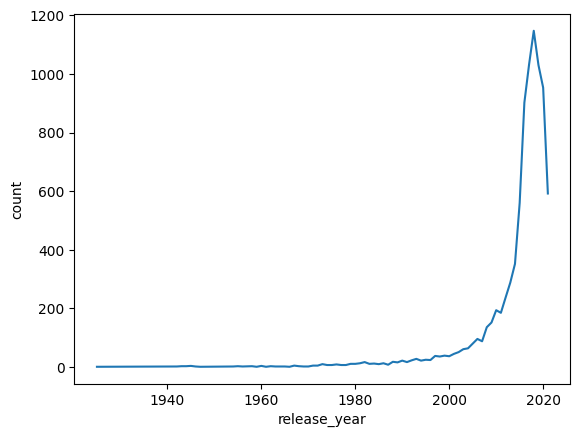

In [ ]:
sns.lineplot(data['release_year'].value_counts())
plt.show()

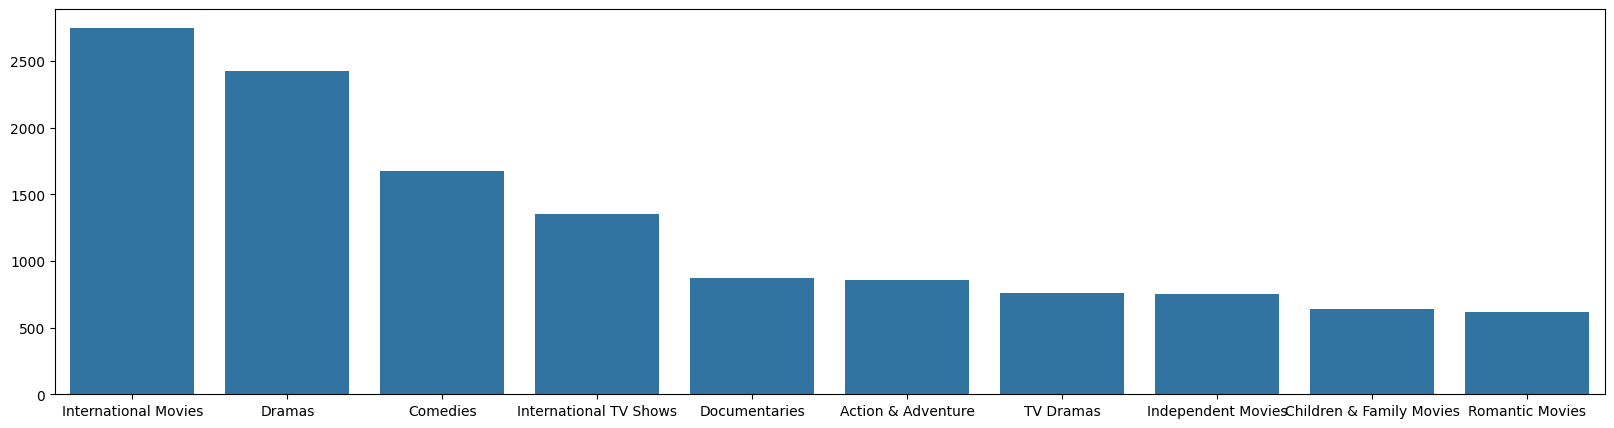

In [ ]:
counts = {}
for val in data['listed_in']:
    for v in val.split(','):
        v = v.strip()
        counts[v] = counts.get(v, 0) + 1

sorted_counts = sorted(counts, key=lambda k: counts[k], reverse=True)

top = 10
sorted_counts = sorted_counts[:top]

f = plt.figure(figsize=(20,5))
sns.barplot(x=sorted_counts, y=[counts[k] for k in sorted_counts], figure=f)
plt.show()

Rating across genres

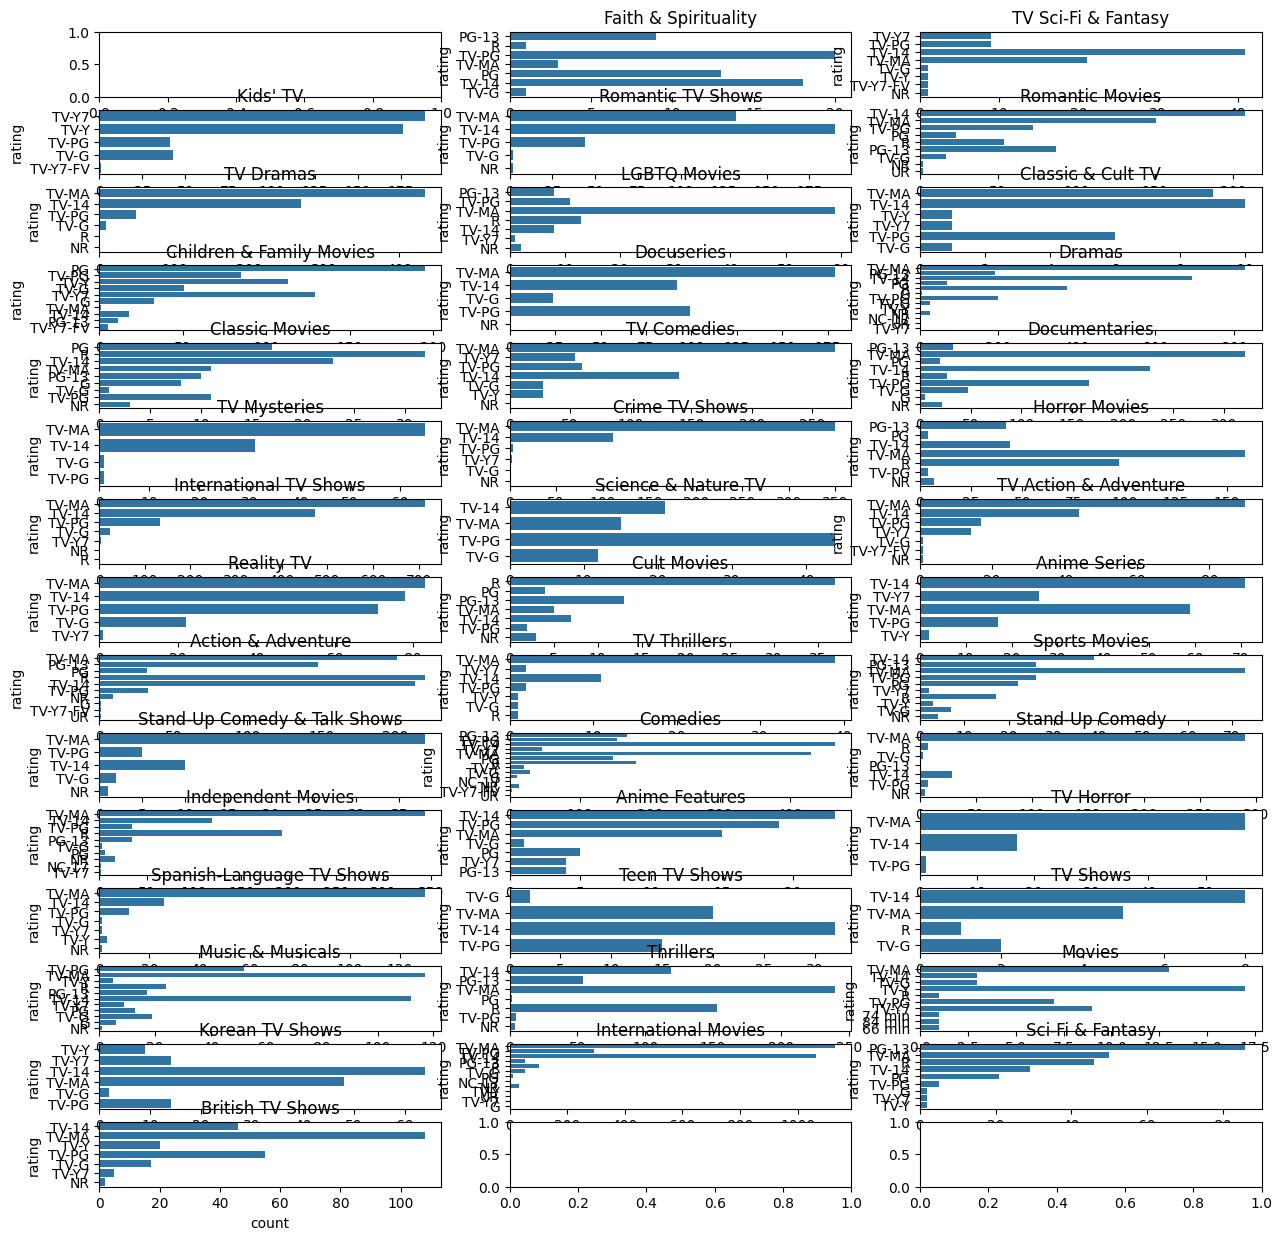

In [ ]:
all_genres = set()
all_ratings = set()
for i in data.index:
    row = data.iloc[i]
    
    genres = row['listed_in']
    genres = genres.split(',')
    for genre in genres:
        all_genres.add(genre.strip())
    
    rating = row['rating']
    all_ratings.add(rating)


new_df = {'genre': [], 'rating': []}
for i in data.index:
    row = data.iloc[i]
    rating = row['rating']
    genres = row['listed_in']
    
    for genre in genres.split(','):
        genre = genre.strip()
        new_df['genre'].append(genre)
        new_df['rating'].append(rating)


new_df = pd.DataFrame(new_df)

f, ax = plt.subplots(len(all_genres) // 3 + 1, 3, figsize=(15, 15))
ax = ax.ravel()
for i, genre in enumerate(all_genres, 1):
    ratings = new_df[new_df['genre'] == genre]['rating']
    ax[i].set_title(genre)
    sns.countplot(new_df[new_df['genre'] == genre]['rating'], ax=ax[i])

plt.show()